# Acceptance of Personal Loan

Excerpt From: Galit Shmueli. “Data Mining for Business Analytics.”


Universal Bank is a relatively young bank that is growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers with varying sizes of relationship with the bank. The customer base of asset customers is quite small, and the bank is interested in growing this base rapidly to bring in more loan business. In particular, it wants to explore ways of converting its liability (deposit) customers to personal loan customers.

A campaign the bank ran for liability customers showed a healthy conversion rate of over 9% successes. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing. The goal of our analysis is to model the previous campaign’s customer behavior to analyze what combination of factors make a customer more likely to accept a personal loan. This will serve as the basis for the design of a new campaign.

The bank’s dataset includes data on 5000 customers. The data include customer demographic information (age, income, etc.), customer response to the last personal loan campaign (Personal Loan), and the customer’s relationship with the bank (mortgage, securities account, etc.).

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import pandas as pd
from dmba import classificationSummary, regressionSummary

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import classificationSummary, regressionSummary

In [3]:
bank_df = pd.read_csv(r'data/UniversalBank.csv')
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


#### Create the independent and dependent features. Split the dataset into train and test:

In [5]:
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((3000, 11), (2000, 11), (3000,), (2000,))

#### (1) Train a Decision Tree Classifier

In [6]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

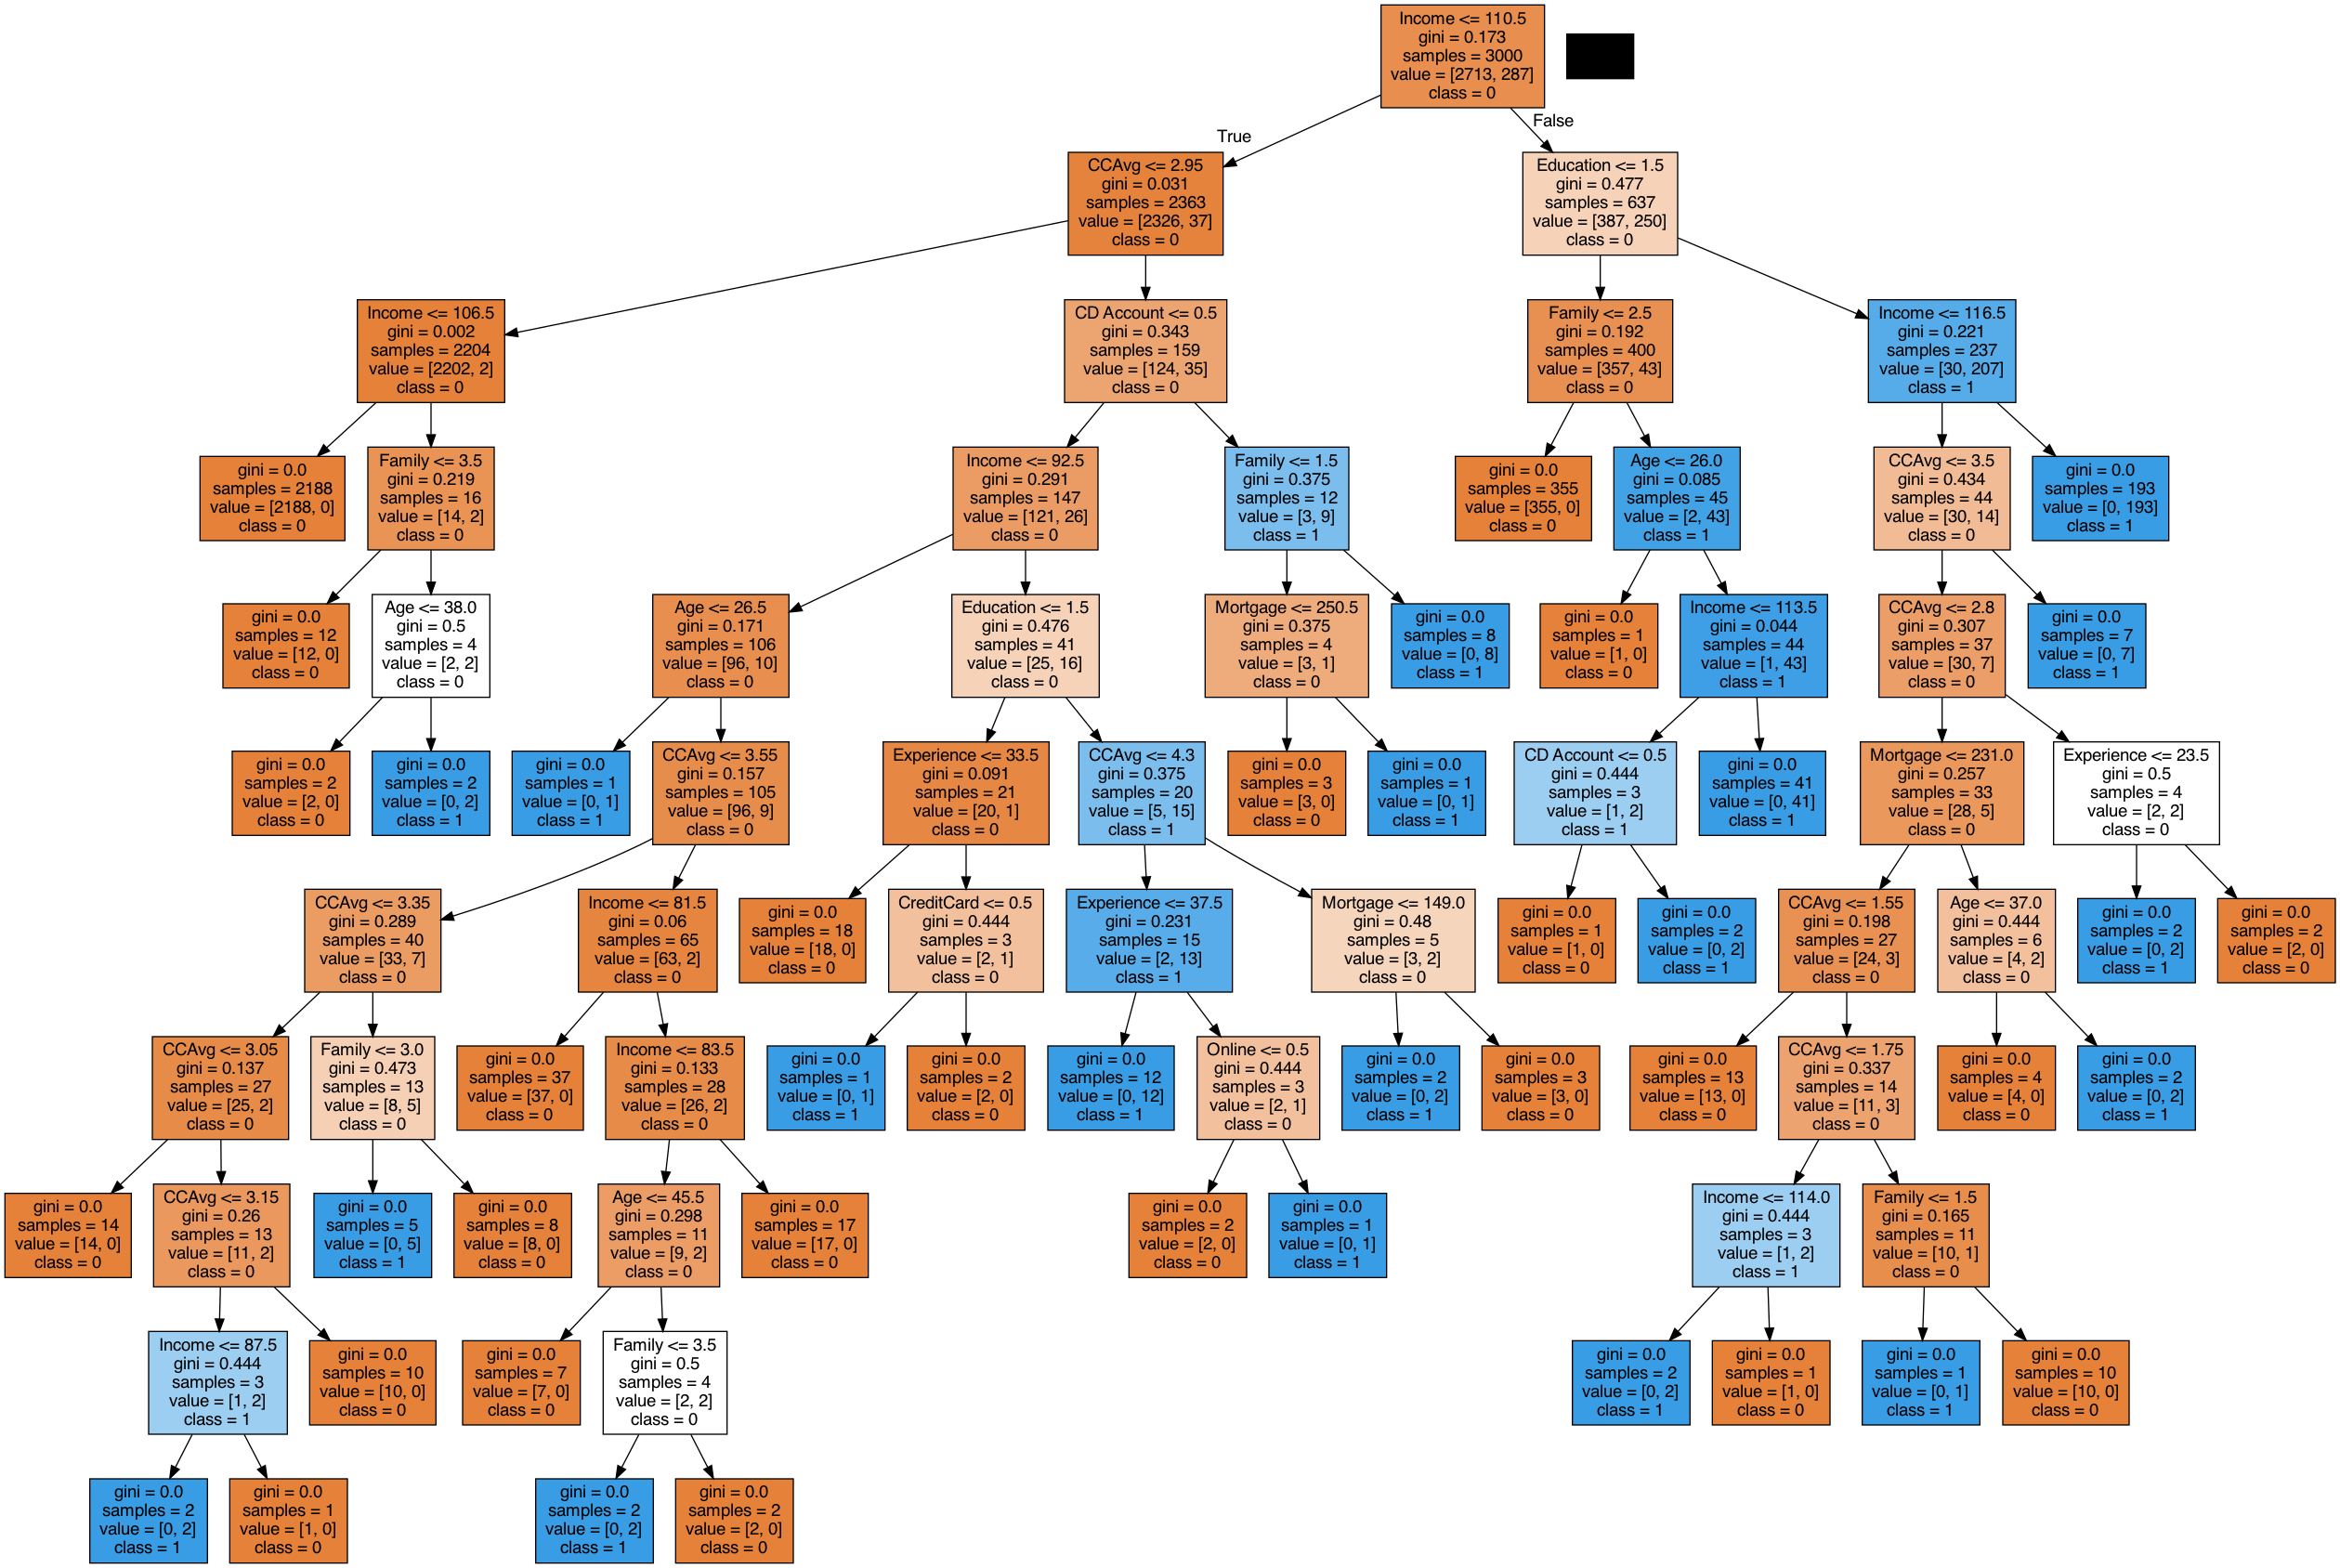

In [7]:
import pydotplus 
from  sklearn import tree
from IPython.display import Image
dot_data = tree.export_graphviz(fullClassTree, feature_names=train_X.columns
                , class_names=['0', '1'],filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

#### (2) Train a Decision Tree Classifier, but Prune using hyperparameters

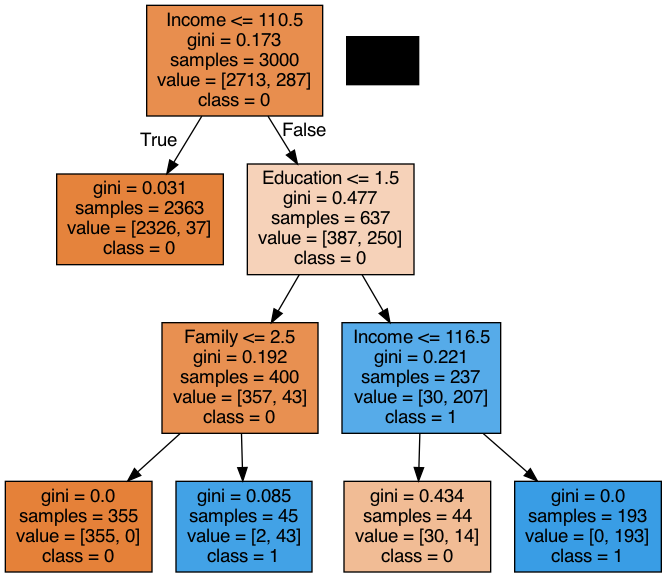

In [8]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20,
                        min_impurity_decrease=0.01, random_state=1)
smallClassTree.fit(train_X, train_y)

dot_data = tree.export_graphviz(smallClassTree, feature_names=train_X.columns
                , class_names=['0', '1'],filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

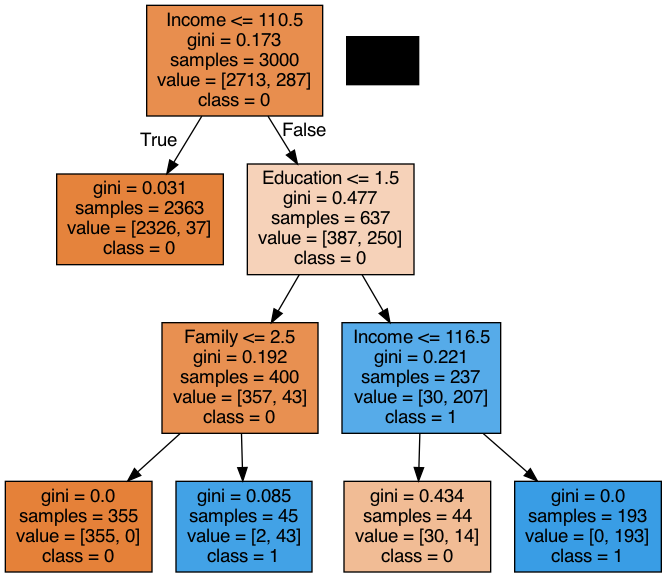

In [9]:
smallClassTree = DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=1)
smallClassTree.fit(train_X, train_y)

dot_data = tree.export_graphviz(smallClassTree, feature_names=train_X.columns
                , class_names=['0', '1'],filled=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

#### (3) Evaluate the trees
#### Full Tree

In [10]:
print ('Full tree')
classificationSummary(train_y,fullClassTree.predict(train_X))

Full tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287


In [11]:
classificationSummary(test_y, fullClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1790   17
     1   25  168


As expected, the training dataset results in 100% accuracy with the learned model. When the learned model is used for predicting the test dataset, then accuracy is 98%. 

#### Small tree

In [12]:
print ('Small tree')
classificationSummary(train_y,smallClassTree.predict(train_X))

Small tree
Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236


In [13]:
classificationSummary(test_y, smallClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


## Cross-validation (CV)
The training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

        A model is trained using k - 1 of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.




> Use cross-validation on the training set, and, after settling on the best tree, use that tree with the validation data to evaluate likely actual performance with new data. 

In [14]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, 
                          n_jobs=-1 )  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9876666666666667
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [15]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)),  # 14 values 
    'min_samples_split': list(range(10, 22)), # 11 values
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], # 3 values
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, 
                          n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.9873333333333333
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


#### Plotting and evaluating performance of fine-tuned classification tree

In [16]:
# fine-tuned tree: training
print ('Training dataset performance:')
classificationSummary(train_y, bestClassTree.predict(train_X))
print ('\nTest dataset performance:')
# fine-tuned tree: test
classificationSummary(test_y, bestClassTree.predict(test_X))

Training dataset performance:
Confusion Matrix (Accuracy 0.9867)

       Prediction
Actual    0    1
     0 2708    5
     1   35  252

Test dataset performance:
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1801    6
     1   31  162
